In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

# Завантажуємо HTML
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html, match="Country/Territory")

df = tables[0]

/var/folders/bm/2y3nccj12jngczhm9kvcc12r0000gn/T/ipykernel_91850/1496610471.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html, match="Country/Territory")


1. Вивести перші 5 рядків

In [3]:
print(df.head())

  Country/Territory IMF (2025)[6] World Bank (2024)[7]  \
0             World     117165394            111326370   
1     United States      30615743             29184890   
2        China[n 1]      19398577             18743803   
3           Germany       5013574              4659929   
4             Japan       4279828              4026211   

  United Nations (2023)[8]  
0                100834796  
1                 27720700  
2                 17794782  
3                  4525704  
4                  4204495  



2. Визначити розмір датасета


In [4]:
print(df.shape)

(222, 4)


3. Визначити оптимальну кількість стовпців.


In [5]:
# таблиця вже має оптимальну кількість стовпців
# якщо треба було б видалити зайві, можна було б використати:
df = df.iloc[:, [0, 1, 2, 3]]

# Додатково видаляємо рядок, з "World"
df = df[df['Country/Territory'] != 'World']

4. Змінити назви стовпців на більш зручні, наприклад

In [6]:
df.columns = ['Country_Territory', 'IMF_2025', 'WorldBank_2024', 'UN_2023']
print("Перші 5 рядків після перейменування:")
print(df.head())

Перші 5 рядків після перейменування:
  Country_Territory  IMF_2025 WorldBank_2024   UN_2023
1     United States  30615743       29184890  27720700
2        China[n 1]  19398577       18743803  17794782
3           Germany   5013574        4659929   4525704
4             Japan   4279828        4026211   4204495
5             India   4125213        3912686   3575778


5. Визначити тип даних

In [7]:
print("Типи даних:")
print(df.dtypes)

Типи даних:
Country_Territory    object
IMF_2025             object
WorldBank_2024       object
UN_2023              object
dtype: object


6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [8]:
df = df.replace('—', np.nan)

In [9]:
# Оскільки є колоки з (2024):
df['IMF_2025'] = df['IMF_2025'].astype(str).str.replace(' (2024)', '', regex=False)

In [10]:
numeric_cols = ['IMF_2025', 'WorldBank_2024', 'UN_2023']
for col in numeric_cols:
    # Прибираємо коми та Конвертуємо в float
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Заміна NaN на середнє значення
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)
    df[col] = df[col].round(2)

print("Типи даних після очищення")
print(df.dtypes)

Типи даних після очищення
Country_Territory     object
IMF_2025             float64
WorldBank_2024       float64
UN_2023              float64
dtype: object


7. Ще раз перевірити наявність пропущених значень.

In [11]:
print("Перевірка пропущених значень (має бути 0)")
print(df.isnull().sum())

Перевірка пропущених значень (має бути 0)
Country_Territory    0
IMF_2025             0
WorldBank_2024       0
UN_2023              0
dtype: int64


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [12]:
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Дублікати видалено.")
else:
    print("Дублікатів не знайдено.")

Кількість дублікатів: 0
Дублікатів не знайдено.


9. Вивести описову статистику датасету describe()

In [13]:
print(df.describe())

           IMF_2025  WorldBank_2024       UN_2023
count  2.210000e+02    2.210000e+02  2.210000e+02
mean   6.032115e+05    5.254645e+05  4.954651e+05
std    2.510073e+06    2.402315e+06  2.285395e+06
min    5.800000e+01    6.200000e+01  6.800000e+01
25%    1.639300e+04    9.623000e+03  8.758000e+03
50%    8.226200e+04    4.418800e+04  4.048400e+04
75%    5.690970e+05    3.450370e+05  2.891140e+05
max    3.061574e+07    2.918489e+07  2.772070e+07


10. Визначте відхилення (різницю) між показниками IMF (MVF) та WorldBank для кожної країни. У яких країнах ці показники найбільше відрізняються?

In [14]:
#  Тимчасова колонку для різниці
df['Diff_IMF_WB'] = abs(df['IMF_2025'] - df['WorldBank_2024'])

# Сортуємо за спаданням різниці
top_diff = df.sort_values(by='Diff_IMF_WB', ascending=False).head(5)

print("Топ-5 країн з найбільшою розбіжністю між даними IMF та WorldBank:")
print(top_diff[['Country_Territory', 'IMF_2025', 'WorldBank_2024', 'Diff_IMF_WB']])

Топ-5 країн з найбільшою розбіжністю між даними IMF та WorldBank:
            Country_Territory     IMF_2025  WorldBank_2024  Diff_IMF_WB
1               United States  30615743.00      29184890.0   1430853.00
2                  China[n 1]  19398577.00      18743803.0    654774.00
211              Saint Martin    603211.49           649.0    602562.49
209            American Samoa    603211.49           871.0    602340.49
207  Northern Mariana Islands    603211.49          1096.0    602115.49


11. Обчисліть кореляцію між показниками. Які пари змінних мають найвищу кореляцію?

In [15]:
correlation_matrix = df[numeric_cols].corr()

print("Матриця кореляції:")
print(correlation_matrix)

Матриця кореляції:
                IMF_2025  WorldBank_2024   UN_2023
IMF_2025        1.000000        0.997574  0.997617
WorldBank_2024  0.997574        1.000000  0.997971
UN_2023         0.997617        0.997971  1.000000


Всі джерела мають дуже високу пряму кореляцію

12. Обчисліть середнє значення для кожного стовпця. Як це середнє значення змінюється між роками?

In [16]:
mean_values = df[numeric_cols].mean()
print("Середні значення ВВП по рокам/джерелам:")
print(mean_values)

Середні значення ВВП по рокам/джерелам:
IMF_2025          603211.487376
WorldBank_2024    525464.478552
UN_2023           495465.089638
dtype: float64


Середнє значення зростає з роками, що може відображати загальний економічний ріст.

13. Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [17]:
df['Variability'] = df[numeric_cols].std(axis=1)


most_variable_country = df.loc[df['Variability'].idxmax()]

print(f"Країна з найвищою варіативністю даних: {most_variable_country['Country_Territory']}")
print(f"Її показник стандартного відхилення: {most_variable_country['Variability']:.2f}")

Країна з найвищою варіативністю даних: United States
Її показник стандартного відхилення: 1447553.49


14. Визначення країни з найвищим та найнижчим показниками у кожному з років.

In [18]:
for col in numeric_cols:
    max_country = df.loc[df[col].idxmax()]['Country_Territory']
    max_val = df[col].max()

    min_country = df.loc[df[col].idxmin()]['Country_Territory']
    min_val = df[col].min()

    print(f"{col}:")
    print(f"Найвищий: {max_country} ({max_val})")
    print(f"Найнижчий: {min_country} ({min_val})")
    print("-" * 20)

IMF_2025:
Найвищий: United States (30615743.0)
Найнижчий: Tuvalu (58.0)
--------------------
WorldBank_2024:
Найвищий: United States (29184890.0)
Найнижчий: Tuvalu (62.0)
--------------------
UN_2023:
Найвищий: United States (27720700.0)
Найнижчий: Tuvalu (68.0)
--------------------


15. Побудуйте гістограму для розподілу показників MVF_2024 (IMF_2025). Який вигляд має розподіл? Чи є країни, що виділяються?

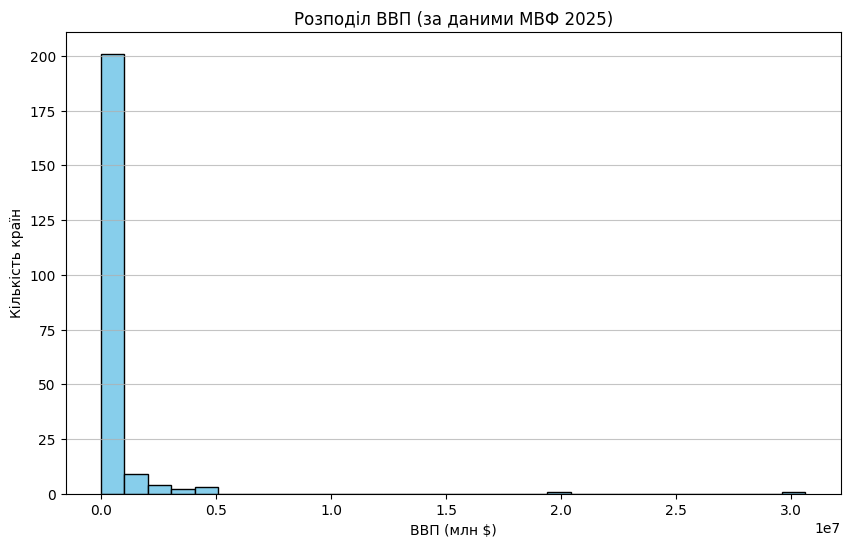

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['IMF_2025'], bins=30, color='skyblue', edgecolor='black')

plt.title('Розподіл ВВП (за даними МВФ 2025)')
plt.xlabel('ВВП (млн $)')
plt.ylabel('Кількість країн')
plt.grid(axis='y', alpha=0.75)
plt.show()

Більшість країн має порівняно малий ВВП.

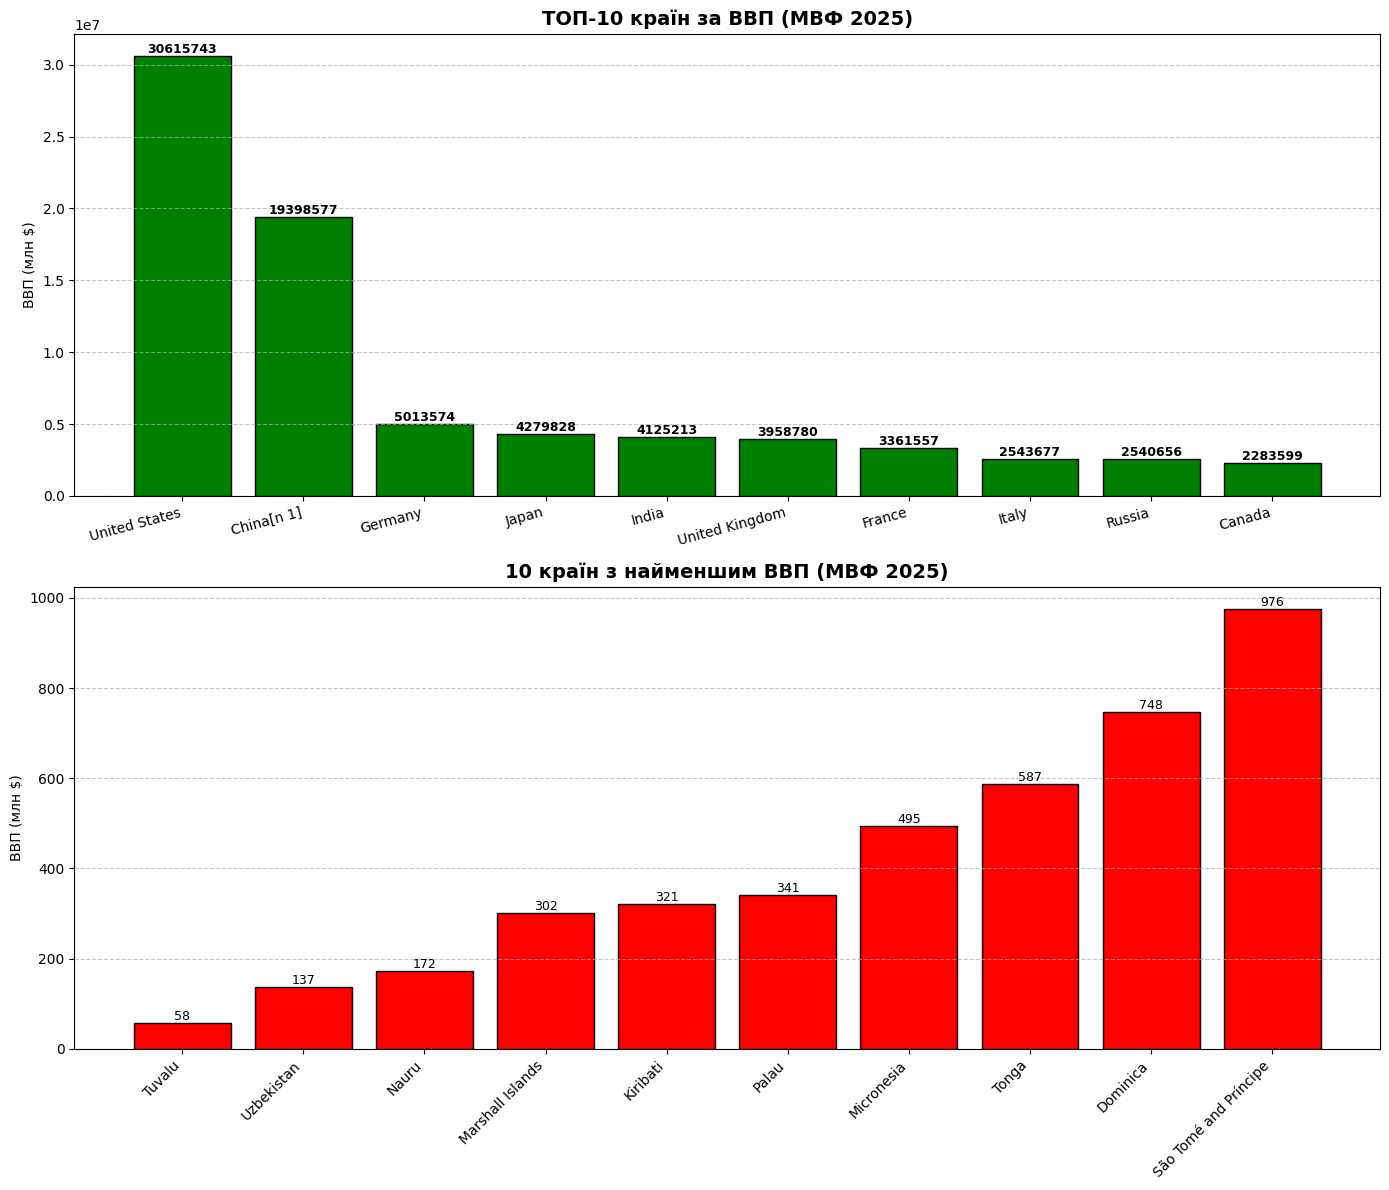

In [22]:
# Топ-10 з кінця та початку
df_sorted = df.sort_values(by='IMF_2025', ascending=False)

top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10).sort_values(by='IMF_2025', ascending=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# ГРАФІК 1: ТОП-10
ax1.bar(top_10['Country_Territory'], top_10['IMF_2025'], color='green', edgecolor='black')
ax1.set_title('ТОП-10 країн за ВВП (МВФ 2025)', fontsize=14, fontweight='bold')
ax1.set_ylabel('ВВП (млн $)')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_10['IMF_2025']):
    ax1.text(i, v, str(int(v)), ha='center', va='bottom', fontsize=9, fontweight='bold')

# ГРАФІК 2: ОСТАННІ 10
ax2.bar(bottom_10['Country_Territory'], bottom_10['IMF_2025'], color='red', edgecolor='black')
ax2.set_title('10 країн з найменшим ВВП (МВФ 2025)', fontsize=14, fontweight='bold')
ax2.set_ylabel('ВВП (млн $)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(bottom_10['IMF_2025']):
    ax2.text(i, v, str(int(v)), ha='center', va='bottom', fontsize=9)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=15, ha="right")
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

Так, є два гігантських викиди, які чітко видно: США -> ~30.6 трлн та Китай -> ~19.4 трлн. У цих країн величезний відрив від решти світу

16. Розрахуйте частку кожної країни в загальному значенні. Як змінюються частки країн з часом?

In [23]:
# Розрахунок часток (%)
total_imf = df['IMF_2025'].sum()
total_wb = df['WorldBank_2024'].sum()
total_un = df['UN_2023'].sum()

df['Share_IMF'] = (df['IMF_2025'] / total_imf) * 100
df['Share_WB'] = (df['WorldBank_2024'] / total_wb) * 100
df['Share_UN'] = (df['UN_2023'] / total_un) * 100

# Зміни часток для топ-5 країн
top_5_countries = df.nlargest(5, 'IMF_2025')
print(top_5_countries[['Country_Territory', 'Share_UN', 'Share_WB', 'Share_IMF']])

  Country_Territory   Share_UN   Share_WB  Share_IMF
1     United States  25.316220  25.131732  22.965871
2        China[n 1]  16.251271  16.140689  14.551508
3           Germany   4.133147   4.012764   3.760846
4             Japan   3.839799   3.467056   3.210439
5             India   3.265617   3.369297   3.094457


Частки країн змінюються незначно протягом короткого періоду (3 роки).
США та Китай займають найбільшу частку світової економіки (разом понад 40%).
Якщо частка країни зростає від UN_2022 до IMF_2025 -> економіка росте швидше за середньосвітову.

17. Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад?

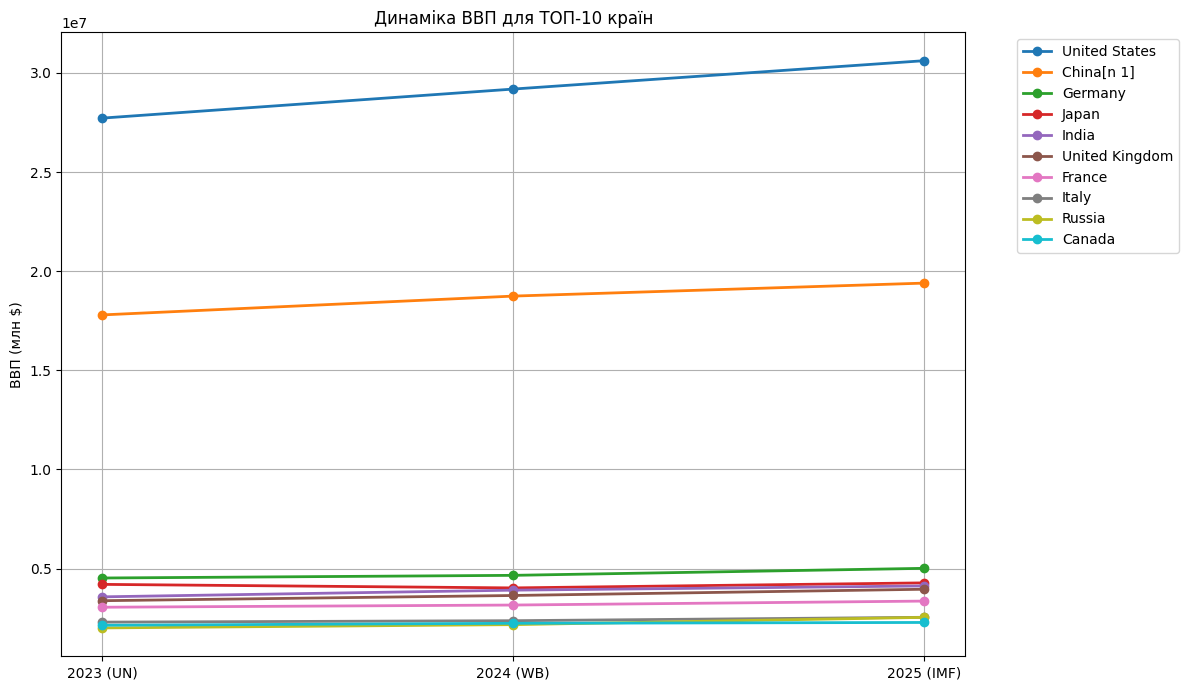

In [24]:
top_10 = df.nlargest(10, 'IMF_2025')

plt.figure(figsize=(12, 7))

years = ['2023 (UN)', '2024 (WB)', '2025 (IMF)']
cols = ['UN_2023', 'WorldBank_2024', 'IMF_2025']

for index, row in top_10.iterrows():
    gdp_values = [row[cols[0]], row[cols[1]], row[cols[2]]]
    plt.plot(years, gdp_values, marker='o', label=row['Country_Territory'], linewidth=2)

plt.title('Динаміка ВВП для ТОП-10 країн')
plt.ylabel('ВВП (млн $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

З топ-10 країн, США, Китай, Німеччина, Японія та ішші демонструють стабільне зростання ВВП за три роки. Ну і, звичайно, найбільше виділяється США.

ВИСНОВКИ. У цій роботі були відпрацьовані ключові навички роботи з Pandas та Matplotlib. Від завантаження неструктурованих даних і їхнього очищення до застосування векторизованих статистичних методів та створення інформативних візуалізацій, які підтвердили концентрацію ВВП у кількох світових лідерів.